<a href="https://colab.research.google.com/github/Brousigma/M1_Projet_DS_Groupe/blob/main/Copie_de_Projet_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importations

In [ ]:
# importation des bibliothèques

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.api as sm
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time


# For missing values visualization
!pip install missingno
import missingno as msno

# For outlier detection
!pip install pyod
from pyod.models.iforest import IForest

# For QQ plot data calculation
from scipy.stats import stats
# Step 0: Create and Load Dataset

# Etape 1 : Informations sur la base de données et prétraitement

In [ ]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

# importation du fichier excel train_etu en dataframe
df=pd.read_excel("/content/drive/My Drive/train_etu.xls")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Identifiant,date_accident,date_communication,age,sexe,status_marital,enfants,autre_dep,salaire_semaine,patrimoine,type_emploi,heure_par_semaine,jour_par_semaine,description,cout_init,cout_ultime
0,W0000001,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,42938.0,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,W0000002,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,415347.0,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,W0000003,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,1655066.0,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,W0000004,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,7507555.0,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,W0000005,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,293251.0,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45667,W0045668,1994-08-12T11:00:00Z,1994-09-15T00:00:00Z,50,M,M,2,0,696.05,NaN,F,38.0,5,LIFTING BACK STRAIN LOWER BACK STRAIN,11500,9785.507185
45668,W0045669,1996-11-21T14:00:00Z,1997-01-25T00:00:00Z,32,M,S,0,0,200.00,NaN,F,38.0,5,STRUCK STOVE LACERATION RIGHT LOWER FOREARM,1000,440.635652
45669,W0045670,1989-03-14T09:00:00Z,1989-04-11T00:00:00Z,30,M,S,0,0,615.38,NaN,F,38.0,5,FELL DOWN ON KNEE LEFT KNEE INJURY SWOLLEN,1500,12391.392090
45670,W0045671,2004-09-22T15:00:00Z,2004-10-02T00:00:00Z,40,M,S,2,0,561.26,NaN,F,38.0,5,LIFTED NETBALL HOOP NECK NECK STRAIN,9500,8483.748442


Voyons l'ensemble des valeurs prises par la variable autre_dep

In [ ]:

set(df.autre_dep)

{0, 1, 2, 3}

In [ ]:
# Suppression des variables non-pertinentes (Identifiant, date_accident, date_communication)

df = df.drop(["Identifiant", "date_accident", "date_communication"], axis=1)
df

,age,sexe,status_marital,enfants,autre_dep,salaire_semaine,patrimoine,type_emploi,heure_par_semaine,jour_par_semaine,description,cout_init,cout_ultime
0,48,M,M,0,0,500.00,42938.0,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,43,F,M,0,0,509.34,415347.0,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,30,M,U,0,0,709.10,1655066.0,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,41,M,S,0,0,555.46,7507555.0,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,36,M,M,0,0,377.10,293251.0,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45667,50,M,M,2,0,696.05,NaN,F,38.0,5,LIFTING BACK STRAIN LOWER BACK STRAIN,11500,9785.507185
45668,32,M,S,0,0,200.00,NaN,F,38.0,5,STRUCK STOVE LACERATION RIGHT LOWER FOREARM,1000,440.635652
45669,30,M,S,0,0,615.38,NaN,F,38.0,5,FELL DOWN ON KNEE LEFT KNEE INJURY SWOLLEN,1500,12391.392090
45670,40,M,S,2,0,561.26,NaN,F,38.0,5,LIFTED NETBALL HOOP NECK NECK STRAIN,9500,8483.748442


In [ ]:
df.patrimoine


,patrimoine
0,42938.0
1,415347.0
2,1655066.0
3,7507555.0
4,293251.0
...,...
45667,NaN
45668,NaN
45669,NaN
45670,NaN


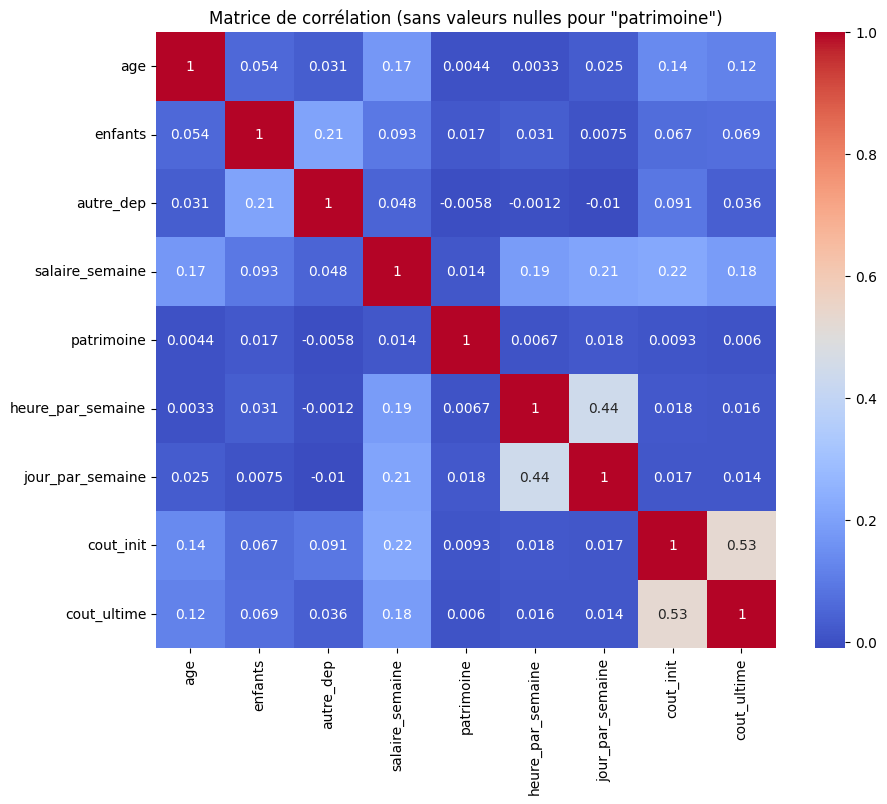

In [ ]:
# Corrélations sans les valeurs manquantes dans patrimoine

# on sélectionne les variables continues
df_num = df.select_dtypes(include=['float64', 'int64'])

# Filtrer les données en supprimant les lignes où 'patrimoine' est nul
df_filtered = df_num.dropna(subset=['patrimoine'])

# Calculer la matrice de corrélation sur les données filtrées
corr_matrix = df_filtered.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation (sans valeurs nulles pour "patrimoine")')
plt.show()

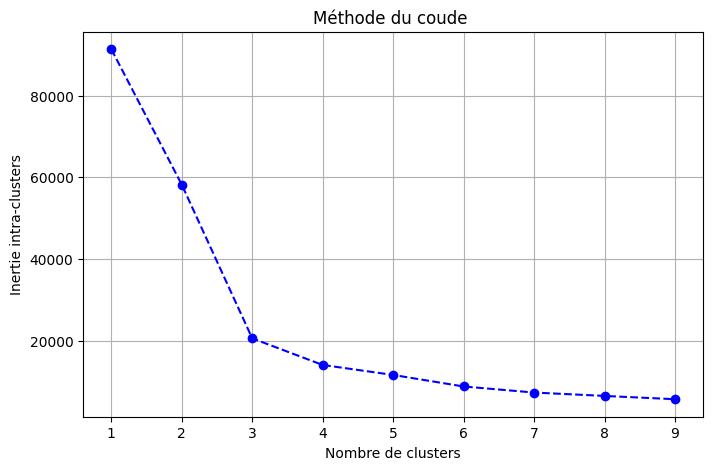

Résumé des clusters :
   Cluster        age            patrimoine                       
                mean min max          mean        min         max
0       0  25.674771  13  36  5.412118e+05     1001.0   4105393.0
1       1  46.912285  37  81  5.270987e+05     1024.0   4045874.0
2       2  34.257329  16  62  7.474343e+06  4138629.0  10981419.0


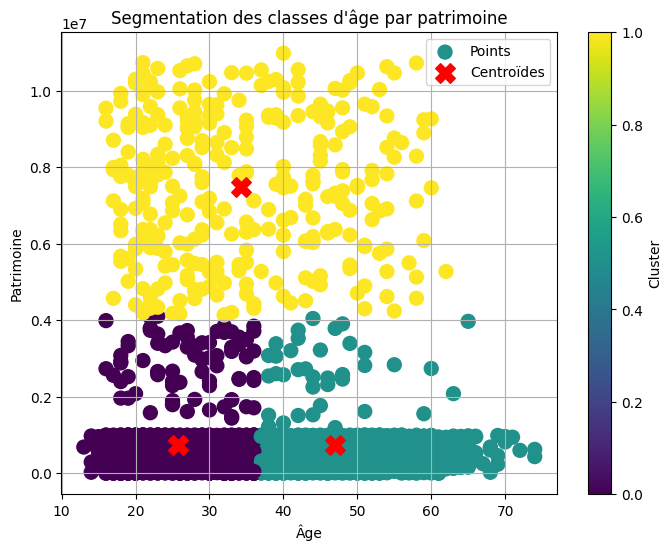

In [ ]:
# segmentation de la variable age par patrimoine en utilisant Kmeans

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Préparation des données avec imputation des NaN
data = df[['age', 'patrimoine']].copy()

# Imputation des valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Trouver le nombre optimal de clusters avec la méthode du coude
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Tracer le graphe de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Méthode du coude ')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intra-clusters')
plt.grid()
plt.show()

# Appliquer K-means avec un nombre choisi de clusters (par exemple, 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyse des clusters
cluster_summary = df.groupby('Cluster').agg({
    'age': ['mean', 'min', 'max'],
    'patrimoine': ['mean', 'min', 'max']
}).reset_index()

# Afficher le résumé des clusters
print("Résumé des clusters :\n", cluster_summary)

# Visualisation des clusters avec les centroïdes
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['patrimoine'], c=df['Cluster'], cmap='viridis', s=100, label='Points')
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],  # Centre des clusters (âge)
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],  # Centre des clusters (patrimoine)
    c='red', marker='X', s=200, label='Centroïdes'
)
plt.title('Segmentation des classes d\'âge par patrimoine')
plt.xlabel('Âge')
plt.ylabel('Patrimoine')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# segmentation de la variable age et imputation des valeurs manquantes de patrimoine

# Créer des tranches d'âge (avec des intervalles logiques, un peu comme si je découpais les âges)
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 60, np.inf], labels=['0-25', '26-40', '41-60', '61+'])

# Vérifier les groupes
print("\nRépartition des groupes d'âge :")
print(df['age_group'].value_counts())

# Remplir les valeurs manquantes dans 'patrimoine' par la médiane des groupes d'âge
df['patrimoine'] = df.groupby('age_group')['patrimoine'].transform(lambda x: x.fillna(x.median()))

# Vérifier les valeurs manquantes après traitement
print("\nValeurs manquantes après traitement :", df['patrimoine'].isnull().sum())

# Sauvegarder le DataFrame traité (nouveau)"hahahahahaha"
df.to_excel('fichier_patrimoine_rempli.xlsx', index=False)
print("\nFichier traité et sauvegardé sous 'fichier_patrimoine_rempli.xlsx'.")




Répartition des groupes d'âge :
age_group
26-40    17716
0-25     14456
41-60    12648
61+        852
Name: count, dtype: int64

Valeurs manquantes après traitement : 0


<ipython-input-12-cc647b1f28f7>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['patrimoine'] = df.groupby('age_group')['patrimoine'].transform(lambda x: x.fillna(x.median()))



Fichier traité et sauvegardé sous 'fichier_patrimoine_rempli.xlsx'.


In [ ]:
# Chargement de la colonne description
df.description


,description
0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY
1,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...
2,CUT ON SHARP EDGE CUT LEFT THUMB
3,DIGGING LOWER BACK LOWER BACK STRAIN
4,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...
...,...
45667,LIFTING BACK STRAIN LOWER BACK STRAIN
45668,STRUCK STOVE LACERATION RIGHT LOWER FOREARM
45669,FELL DOWN ON KNEE LEFT KNEE INJURY SWOLLEN
45670,LIFTED NETBALL HOOP NECK NECK STRAIN


 Remarquons que cette variable décrit le mouvemenr qui a conduit à la blessure ainsi que les parties du corps blessées


## Prétraitement et catégorisation de la variable description (Armel)

Nous voulons catégoriser la variable textuelle description en 6 catégories selon la ou les parties du corps impactées par l'accident.
Pour cela, nous créons 7 catégories, regroupements de ces 3 catégories suivantes : bas_du_corps, milieu_du_corps, haut_du_corps. Les catégories regroupées sont : bas_et_milieu_du_corps, bas_et_haut_du_corps, milieu_et_haut_du_corps et corps_entier.

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Télécharger les ressources nécessaires de NLTK
nltk.download('punkt')  # Ressource pour la tokenisation
nltk.download('stopwords')  # Ressource pour les stopwords


# Définir les mots-clés pour chaque catégorie
haut_du_corps_keywords = {"arm", "wrist", "shoulder", "neck", "forearm", "hand", "elbow"}
milieu_du_corps_keywords = {"back", "spine", "abdomen"}
bas_du_corps_keywords = {"knee", "leg", "thigh", "ankle", "foot", "hip"}

description
# Fonction pour prétraiter et catégoriser une description
def categorize_description(description):
    # Tokenisation et prétraitement
    tokens = word_tokenize(description.lower())  # Convertir en minuscules et tokeniser
    tokens = [word for word in tokens if word.isalnum()]  # Supprimer la ponctuation
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Supprimer les stopwords

    # Vérifier la présence des mots-clés
    haut_du_corps = any(word in haut_du_corps_keywords for word in tokens)
    milieu_du_corps = any(word in milieu_du_corps_keywords for word in tokens)
    bas_du_corps = any(word in bas_du_corps_keywords for word in tokens)

    # Déterminer la catégorie en fonction des combinaisons
    if haut_du_corps and milieu_du_corps and bas_du_corps:
        return "corps_entier"
    elif haut_du_corps and milieu_du_corps:
        return "milieu_et_haut_du_corps"
    elif haut_du_corps and bas_du_corps:
        return "bas_et_haut_du_corps"
    elif milieu_du_corps and bas_du_corps:
        return "bas_et_milieu_du_corps"
    elif haut_du_corps:
        return "haut_du_corps"
    elif milieu_du_corps:
        return "milieu_du_corps"
    elif bas_du_corps:
        return "bas_du_corps"
    else:
        return "autre"  # Catégorie par défaut si aucune correspondance

# Appliquer la fonction à chaque ligne de la colonne "description"
df["categorie"] = df["description"].apply(categorize_description)

# Afficher le résultat
print(df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'description' is not defined

In [ ]:
# Description des variables de la base de données

df.info()

La variable description nécessite une segmentation. Dans une premier temps, nous faisons le choix de construire un modèle de prédiction en ôtant cette variable de la base de données.


In [ ]:
# Suppresion de la colonne description

df = df.drop("description", axis=1)

df

,age,sexe,status_marital,enfants,autre_dep,salaire_semaine,patrimoine,type_emploi,heure_par_semaine,jour_par_semaine,cout_init,cout_ultime,Cluster,age_group
0,48,M,M,0,0,500.00,42938.0,F,38.0,5,1500,4748.203388,1,41-60
1,43,F,M,0,0,509.34,415347.0,F,37.5,5,5500,6326.285819,1,41-60
2,30,M,U,0,0,709.10,1655066.0,F,38.0,5,1700,2293.949087,0,26-40
3,41,M,S,0,0,555.46,7507555.0,F,38.0,5,15000,17786.487170,2,41-60
4,36,M,M,0,0,377.10,293251.0,F,38.0,5,2800,4014.002925,0,26-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45667,50,M,M,2,0,696.05,528870.0,F,38.0,5,11500,9785.507185,1,41-60
45668,32,M,S,0,0,200.00,530555.5,F,38.0,5,1000,440.635652,0,26-40
45669,30,M,S,0,0,615.38,530555.5,F,38.0,5,1500,12391.392090,0,26-40
45670,40,M,S,2,0,561.26,530555.5,F,38.0,5,9500,8483.748442,1,26-40


age                   0
sexe                  0
status_marital       24
enfants               0
autre_dep             0
salaire_semaine       0
patrimoine            0
type_emploi           0
heure_par_semaine     0
jour_par_semaine      0
cout_init             0
cout_ultime           0
Cluster               0
age_group             0
dtype: int64


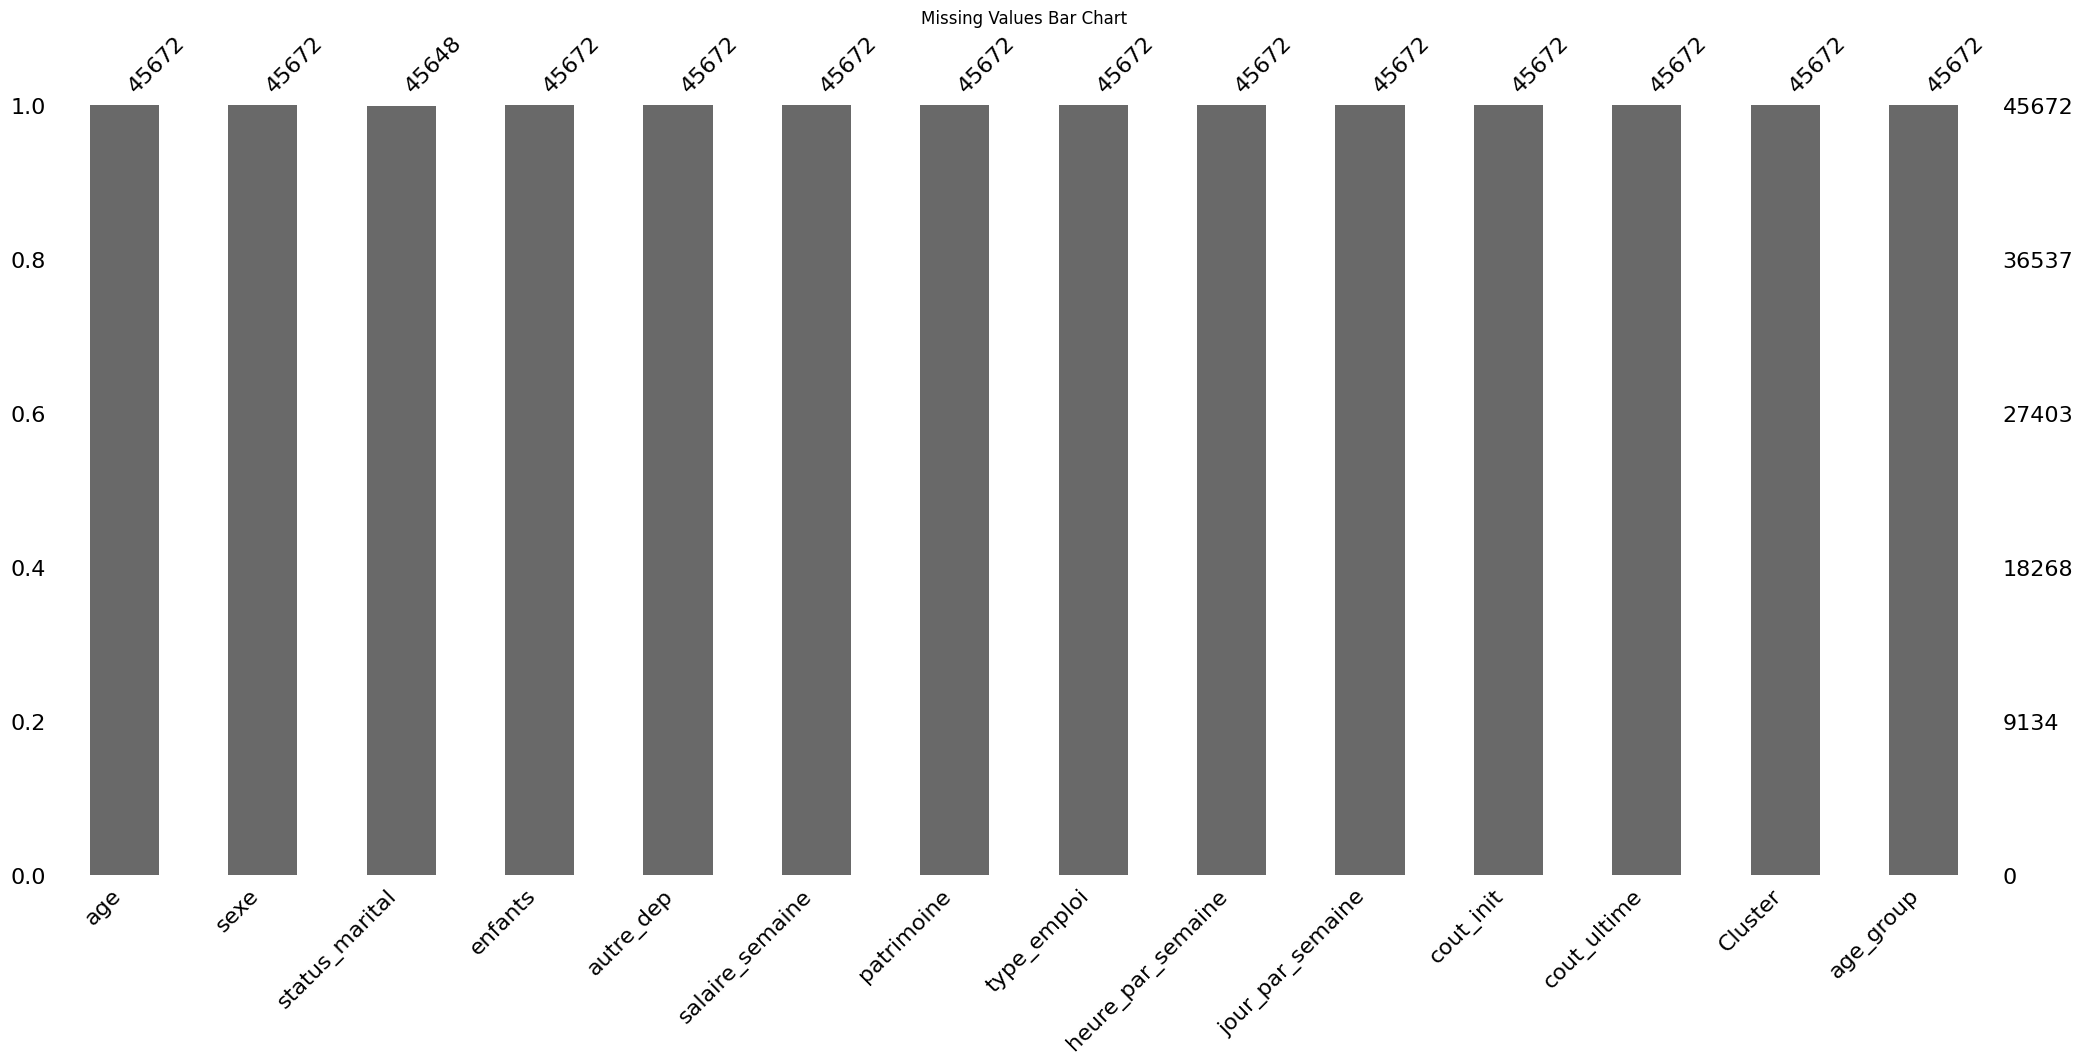


Proportions of Missing Values per Column (%):
 age                  0.000000
sexe                 0.000000
status_marital       0.052549
enfants              0.000000
autre_dep            0.000000
salaire_semaine      0.000000
patrimoine           0.000000
type_emploi          0.000000
heure_par_semaine    0.000000
jour_par_semaine     0.000000
cout_init            0.000000
cout_ultime          0.000000
Cluster              0.000000
age_group            0.000000
dtype: float64


In [ ]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()

# Affichage des valeurs manquantes par colonne
print(missing_values)


# Visualiser les valeurs manquantes sous forme de graphique en barres avec missingno
msno.bar(df)
plt.title("Missing Values Bar Chart")
plt.show()

# Calculer le pourcentage de valeurs manquantes par colonne
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Afficher les proportions de valeurs manquantes
print("\nProportions of Missing Values per Column (%):\n", missing_percentage)



                             Colonne  Proportion Manquante (%)
age                              age                  0.000000
sexe                            sexe                  0.000000
status_marital        status_marital                  0.052549
enfants                      enfants                  0.000000
autre_dep                  autre_dep                  0.000000
salaire_semaine      salaire_semaine                  0.000000
patrimoine                patrimoine                  0.000000
type_emploi              type_emploi                  0.000000
heure_par_semaine  heure_par_semaine                  0.000000
jour_par_semaine    jour_par_semaine                  0.000000
cout_init                  cout_init                  0.000000
cout_ultime              cout_ultime                  0.000000
Cluster                      Cluster                  0.000000
age_group                  age_group                  0.000000


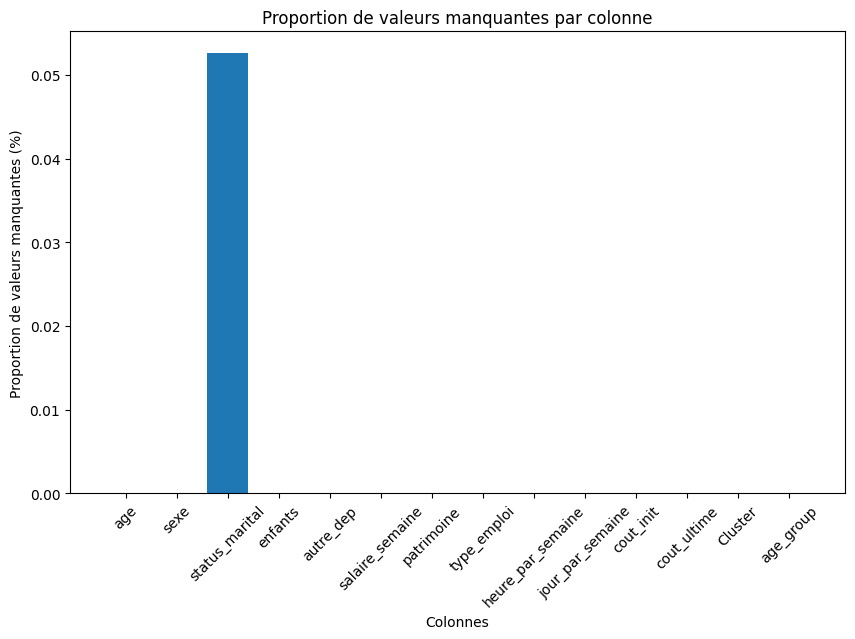

In [ ]:
# Calculer la proportion de valeurs manquantes pour chaque colonne
proportion_manquante = (df.isnull().sum() / len(df)) * 100

# Créer un DataFrame pour afficher le résultat
tableau_proportion_manquante = pd.DataFrame({'Colonne': df.columns, 'Proportion Manquante (%)': proportion_manquante})

# Afficher le tableau
print(tableau_proportion_manquante)

# Diagramme de proportion des valeurs manquantes

plt.figure(figsize=(10, 6))
plt.bar(tableau_proportion_manquante['Colonne'], tableau_proportion_manquante['Proportion Manquante (%)'])
plt.xlabel('Colonnes')
plt.ylabel('Proportion de valeurs manquantes (%)')
plt.title('Proportion de valeurs manquantes par colonne')
plt.xticks(rotation=45)  # Pour incliner les labels des colonnes si nécessaire
plt.show()

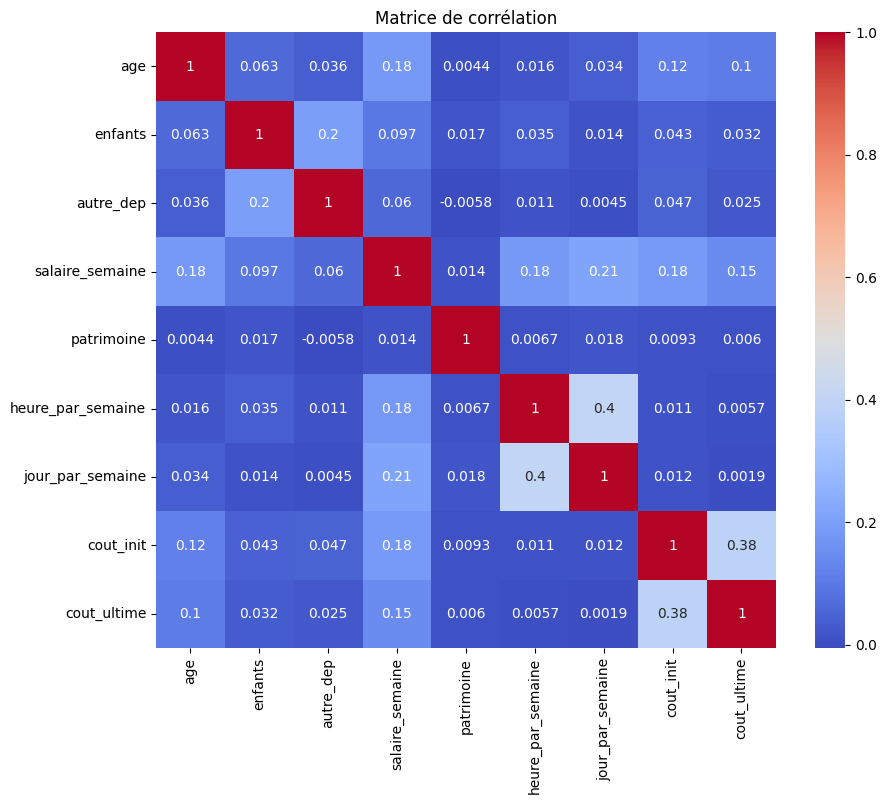

In [ ]:
# matrice de corrélation entre variables continues de df

# On calcule la matrice de corrélation
corr_matrix = df_num.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

En conclusion, la variable Patrimoine est insignificativement corrélée à la variable cible cout_ultime. Comme cette variable comporte plus de 80% de valeurs manquantes.


In [ ]:
print(df.columns)

Index(['age', 'sexe', 'status_marital', 'enfants', 'autre_dep',
       'salaire_semaine', 'patrimoine', 'type_emploi', 'heure_par_semaine',
       'jour_par_semaine', 'cout_init', 'cout_ultime', 'Cluster', 'age_group'],
      dtype='object')


# Etape 2 : Détection des valeurs aberrantes par intervalle inter-quantile et plus

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))
outliers_present = outlier_mask.any(axis=1)
print("\nNumber of Outliers Detected:", outliers_present.sum())

df_clean = df[~outliers_present]
print("DataFrame shape after outlier removal:", df_clean.shape)


Number of Outliers Detected: 19976
DataFrame shape after outlier removal: (25696, 14)



Number of Outliers Detected by PYOD IForest: 4568


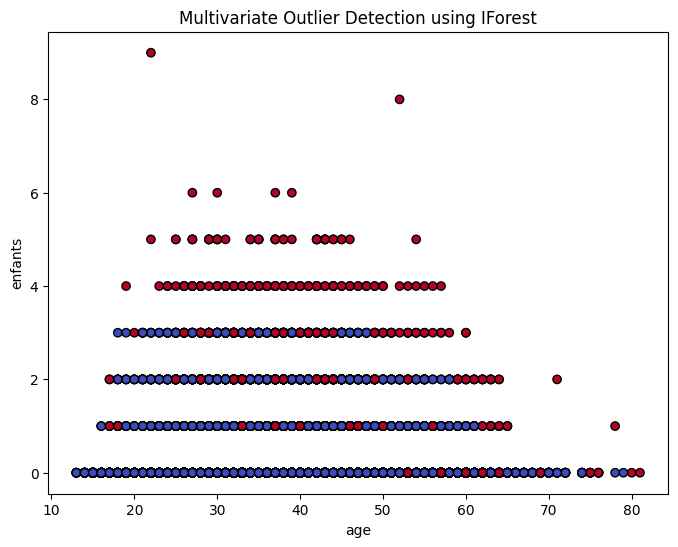

DataFrame shape after outlier removal: (41104, 14)


In [ ]:
# Using an Isolation Forest for outlier detection on numeric features
X_numeric = df[num_cols]
clf = IForest(contamination=0.1, random_state=42)
clf.fit(X_numeric)
outlier_labels = clf.labels_  # 1 for outliers, 0 for inliers

# Count outliers
outliers_present = (outlier_labels == 1)
print("\nNumber of Outliers Detected by PYOD IForest:", outliers_present.sum())

# Visualize outliers in a 2D scatter plot (choose two numeric features)
if len(num_cols) >= 2:
    plt.figure(figsize=(8,6))
    plt.scatter(X_numeric[num_cols[0]], X_numeric[num_cols[1]], c=outlier_labels, cmap='coolwarm', edgecolor='k')
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.title("Multivariate Outlier Detection using IForest")
    plt.show()

df_clean = df[~outliers_present]
print("DataFrame shape after outlier removal:", df_clean.shape)

# Etape 3 : préparation des données pour le machine learning supervisé

In [ ]:
# On veut prédire le coût ultime à partir des autres données
# Nous considérons la variable "cout_ultime" comme la varibale cible

# For demonstration, let's predict Salary from the other features.
# We'll consider "Salary" as the target variable and the rest as features.
X = df.drop("cout_ultime", axis=1)
y = df["cout_ultime"]

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Pour les colonnes numériques
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Ignore les catégories inconnues
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# df.head()

# X_train.head()

# Afficher les 5 lignes de X_train à partir de la 12348e valeur
# print(X_train.iloc[12348:12353])

AttributeError: 'ColumnTransformer' object has no attribute 'head'

# Etape 4 : Application de différents modèles de régression

In [ ]:
models = {"Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=500),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=500)}


results = {}
inference_times = {}

for model_name, model_obj in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model_obj)
    ])
    pipe.fit(X_train, y_train)

    # Inference time measurement
    start_time = time.time()
    y_pred = pipe.predict(X_test)
    end_time = time.time()
    inference_time = end_time - start_time
    inference_times[model_name] = inference_time

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = (pipe, rmse, y_pred)

# Print RMSE results
print("\nModel Performance (RMSE):")
for model_name, (pipe, rmse, y_pred) in results.items():
    print(f"{model_name}: RMSE = {rmse:.2f}")


Model Performance (RMSE):
Linear Regression: RMSE = 25272.01
Decision Tree: RMSE = 53899.19
Random Forest: RMSE = 33286.94
Gradient Boosting: RMSE = 29784.11


# Etape 5 : Validation des modèles (Gipsy)

# Etape 6 : Prédiction (Mariama)



In [ ]:
# Chargement des données de la feuille test

file_path = "/content/drive/My Drive/train_etu.xls"
test_data = pd.read_excel(file_path, sheet_name='test')



### Préparation de la base de données de prédiction (Pipeline)

In [ ]:
# Vérification des colonnes et du type de variables
print("\nColonnes de train :")
print(df.columns)  # df représente la base train préparée
print("\nColonnes de test :")
print(test_data.columns)

 # comparer colonne par colonne


Colonnes de train :
Index(['age', 'sexe', 'status_marital', 'enfants', 'autre_dep',
       'salaire_semaine', 'patrimoine', 'type_emploi', 'heure_par_semaine',
       'jour_par_semaine', 'cout_init', 'cout_ultime', 'Cluster', 'age_group'],
      dtype='object')

Colonnes de test :
Index(['Identifiant', 'date_accident', 'date_communication', 'age', 'sexe',
       'status_marital', 'enfants', 'autre_dep', 'salaire_semaine',
       'patrimoine', 'type_emploi', 'heure_par_semaine', 'jour_par_semaine',
       'description', 'cout_init', 'Y'],
      dtype='object')


In [ ]:
 # Vérifier si il y a des colonnes inutiles en calculant les corrélations entre les colonnes numériques et cout ultime

# Calculer les corrélations en excluant les colonnes non numériques
correlations = df.select_dtypes(include=['float64', 'int64']).corr()

# Afficher la corrélation avec la cible
print("\nCorrélation avec la cible :")
print(correlations['cout_ultime'])




Corrélation avec la cible :
age                  0.104863
enfants              0.031928
autre_dep            0.025314
salaire_semaine      0.146364
patrimoine           0.001669
heure_par_semaine    0.005661
jour_par_semaine     0.001935
cout_init            0.384432
cout_ultime          1.000000
Name: cout_ultime, dtype: float64


In [ ]:
# Ici, je prendrai pour supprimer si éventuellement
cols_to_drop = ['col1', 'col2']
test_data = test_data.drop(columns=cols_to_drop, errors='ignore')

  # Gestion des valeurs manquantes
  # Remplissage des valeurs manquantes pour toutes les colonnes
for col in test_data.columns:
    if test_data[col].isnull().sum() > 0:  # Vérifie s'il y a des valeurs manquantes
        if col in df.columns:  # Vérifie que la colonne existe dans df
            if test_data[col].dtype in ['float64', 'int64']:
                # Utilise la médiane du train (sans inplace)
                test_data[col] = test_data[col].fillna(df[col].median())  # Remplace la colonne par la valeur remplie
            else:
                # Utilise la valeur la plus fréquente (sans inplace)
                test_data[col] = test_data[col].fillna(df[col].mode()[0])  # Remplace la colonne par la valeur remplie
        else:
            print(f"Colonne '{col}' n'est pas présente dans 'df', pas de remplissage effectué.")

  # Afficher les données après remplissage
print("\nDonnées après remplissage des valeurs manquantes :")
print(test_data)



Colonne 'Y' n'est pas présente dans 'df', pas de remplissage effectué.

Données après remplissage des valeurs manquantes :
     Identifiant         date_accident    date_communication  age sexe  \
0       W1000000  2002-04-29T19:00:00Z  2002-06-12T00:00:00Z   26    M   
1       W1000001  2003-12-08T15:00:00Z  2004-01-04T00:00:00Z   20    M   
2       W1000002  2002-12-19T15:00:00Z  2003-01-28T00:00:00Z   46    M   
3       W1000003  2003-05-20T11:00:00Z  2003-06-17T00:00:00Z   43    M   
4       W1000004  1996-02-09T15:00:00Z  1996-08-12T00:00:00Z   18    F   
...          ...                   ...                   ...  ...  ...   
8321    W1008321  2000-01-11T15:00:00Z  2000-02-09T00:00:00Z   28    M   
8322    W1008322  2002-11-29T09:00:00Z  2002-12-16T00:00:00Z   18    M   
8323    W1008323  1989-01-11T16:00:00Z  1989-02-23T00:00:00Z   34    F   
8324    W1008324  1995-12-08T16:00:00Z  1995-12-25T00:00:00Z   35    F   
8325    W1008325  2000-08-08T12:00:00Z  2000-09-20T00:00:00Z   

In [ ]:
 # Normalisation des données
# Sélectionner uniquement les colonnes numériques (float64, int64)
cols_to_normalize = test_data.select_dtypes(include=['float64', 'int64']).columns

# Appliquer la normalisation (standardisation) aux colonnes sélectionnées
scaler = StandardScaler()
test_data[cols_to_normalize] = scaler.fit_transform(test_data[cols_to_normalize]) # Je pense que là y a erreur. essayrer de reprendre ce qu'on a fait avec preprocessor pour df

# Afficher les données après normalisation
print(test_data.head())



  Identifiant         date_accident    date_communication       age sexe  \
0    W1000000  2002-04-29T19:00:00Z  2002-06-12T00:00:00Z -0.642892    M   
1    W1000001  2003-12-08T15:00:00Z  2004-01-04T00:00:00Z -1.140681    M   
2    W1000002  2002-12-19T15:00:00Z  2003-01-28T00:00:00Z  1.016403    M   
3    W1000003  2003-05-20T11:00:00Z  2003-06-17T00:00:00Z  0.767509    M   
4    W1000004  1996-02-09T15:00:00Z  1996-08-12T00:00:00Z -1.306611    F   

  status_marital   enfants  autre_dep  salaire_semaine  patrimoine  \
0              S -0.233174  -0.086442         0.455133   -0.365137   
1              S -0.233174  -0.086442         0.341387   -0.500767   
2              S -0.233174  -0.086442         1.180671   -0.532776   
3              S -0.233174  -0.086442         0.341387   -0.071403   
4              S -0.233174  -0.086442        -0.860166    0.104553   

  type_emploi  heure_par_semaine  jour_par_semaine  \
0           F           0.179310          0.143118   
1           F 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Supposons que numeric_features et categorical_features sont déjà définies
# numeric_features : liste des colonnes numériques
# categorical_features : liste des colonnes catégorielles

# Créer un ColumnTransformer pour test_data
test_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Normalisation des colonnes numériques
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encodage des colonnes catégorielles
    ]
)

# Appliquer le ColumnTransformer à test_data
test_data_processed = test_preprocessor.fit_transform(test_data)

# Récupérer les noms des colonnes après transformation
column_names = test_preprocessor.get_feature_names_out()

# Convertir le résultat en DataFrame
test_data_processed = pd.DataFrame(test_data_processed, columns=column_names)

# Afficher les données après transformation
print(test_data_processed.head())

   num__age  num__enfants  num__autre_dep  num__salaire_semaine  \
0 -0.642892     -0.233174       -0.086442              0.455133   
1 -1.140681     -0.233174       -0.086442              0.341387   
2  1.016403     -0.233174       -0.086442              1.180671   
3  0.767509     -0.233174       -0.086442              0.341387   
4 -1.306611     -0.233174       -0.086442             -0.860166   

   num__patrimoine  num__heure_par_semaine  num__jour_par_semaine  \
0        -0.365137                0.179310               0.143118   
1        -0.500767                0.012079               0.143118   
2        -0.532776               -0.238769               0.143118   
3        -0.071403                0.012079               0.143118   
4         0.104553               -1.493007              -3.776633   

   num__cout_init  cat__sexe_F  cat__sexe_M  cat__status_marital_M  \
0        0.067990          0.0          1.0                    0.0   
1       -0.358610          0.0          1.

In [ ]:
 # APPLICATION DU MODELE POUR LA PREDICTION
    # Charger le modèle entraîné (par exemple, un modèle Linear Regression)
model = results['Linear Regression'][0]

    # Prédire les valeurs de 'cout_ultime'  pour la base test
test_data['cout_ultime'] = model.predict(test_data)

    # Afficher un aperçu des prédictions
print("\nAperçu des prédictions :")
print(test_data[['cout_ultime']].head())

    # Exporter les données test avec les prédictions
output_path = "test_predictions.xlsx"
test_data.to_excel(output_path, index=False)

print(f"Les prédictions ont été exportées dans le fichier : {output_path}")




Aperçu des prédictions :
   cout_ultime
0 -1647.792487
1 -1716.551939
2 -1408.287105
3 -1453.141243
4  3421.085187
Les prédictions ont été exportées dans le fichier : test_predictions.xlsx


In [ ]:
 # EVALUATION DES PERFORMANCES DU MODELE (AVEC LA VALIDATION CROISEE)
    # Préparer le modèle
model = LinearRegression()

    # Créer une fonction pour RMSE (car scikit-learn utilise par défaut une perte négative pour optimiser)
scorer = make_scorer(mean_squared_error, greater_is_better=False, squared= False)

    # Définir le nombre de folds pour la validation croisée
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Imputation des valeurs manquantes dans X_train et y_train
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_train = X_train.select_dtypes(include=[np.number])  # Garde uniquement les colonnes numériques
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()

    # Effectuer la validation croisée
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scorer)

    # Afficher les résultats
print("Scores RMSE pour chaque fold :", -cv_scores)  # On inverse le signe car scikit-learn retourne une valeur négative
print("RMSE moyen :", -cv_scores.mean())
print("Écart-type des RMSE :", cv_scores.std())


Scores RMSE pour chaque fold : [nan nan nan nan nan]
RMSE moyen : nan
Écart-type des RMSE : nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.py", line 3195, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/inspect.

In [ ]:
  # Affichage des premières lignes pour vérification
print("Aperçu des données de test :")
print(test_data.head())



Aperçu des données de test :
  Identifiant         date_accident    date_communication       age sexe  \
0    W1000000  2002-04-29T19:00:00Z  2002-06-12T00:00:00Z -0.642892    M   
1    W1000001  2003-12-08T15:00:00Z  2004-01-04T00:00:00Z -1.140681    M   
2    W1000002  2002-12-19T15:00:00Z  2003-01-28T00:00:00Z  1.016403    M   
3    W1000003  2003-05-20T11:00:00Z  2003-06-17T00:00:00Z  0.767509    M   
4    W1000004  1996-02-09T15:00:00Z  1996-08-12T00:00:00Z -1.306611    F   

  status_marital   enfants  autre_dep  salaire_semaine  patrimoine  \
0              S -0.233174  -0.086442         0.455133   -0.365137   
1              S -0.233174  -0.086442         0.341387   -0.500767   
2              S -0.233174  -0.086442         1.180671   -0.532776   
3              S -0.233174  -0.086442         0.341387   -0.071403   
4              S -0.233174  -0.086442        -0.860166    0.104553   

  type_emploi  heure_par_semaine  jour_par_semaine  \
0           F           0.179310       

Nous allons prédire les coûts ultimes